### Using data from SEADE to generate graphics with deaths per city of São Paulo

This program will download official information from the estate of São Paulo to plot graphics of deaths per target city.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
loadCOVID19SP = 'https://github.com/seade-R/dados-covid-sp/raw/master/data/dados_covid_sp.csv'

DataCOVID19SP = pd.read_csv(loadCOVID19SP,
                      delimiter=';', 
                      encoding='utf-8',
                      decimal=',',
                      parse_dates=['datahora'])

DataCOVID19SP = DataCOVID19SP[['nome_munic','datahora','obitos_mm7d']]
DataCOVID19SP['datahora'].tail(1)
#You can see on the datahora bellow what is the last update date.

75019   2020-06-24
Name: datahora, dtype: datetime64[ns]

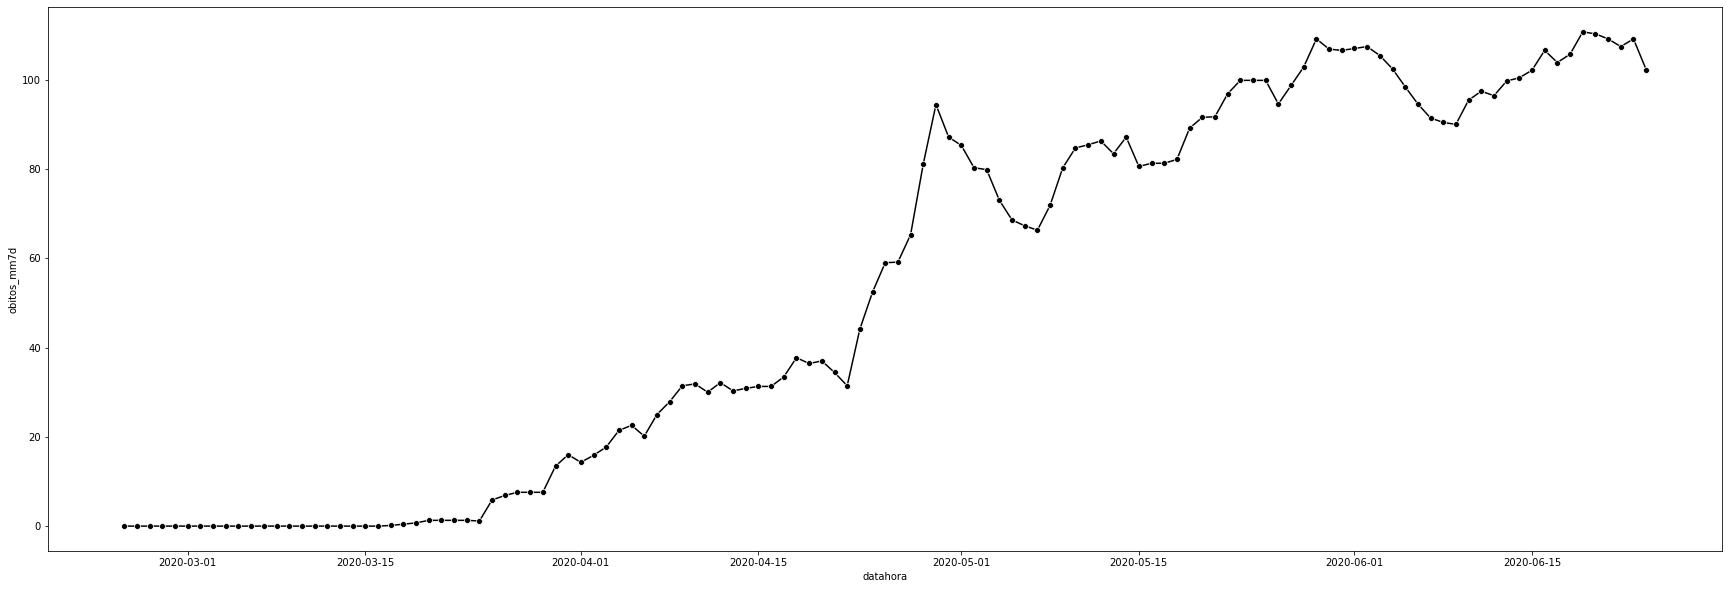

In [19]:
#Gráfico simples com óbitos somente para uma cidade.
obitos_mm7d_SaoPaulo = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']

plt.figure(figsize=(30,10))
sns.lineplot(x='datahora',y='obitos_mm7d', color="black", marker='o', data=obitos_mm7d_SaoPaulo)

plt.show()

In [24]:
#Preparando o dataframe somente com cidades específicas.
#Só consegui partindo de uma como ponto de partida e adicionando outras posteriormente no for com o append.

obitos_mm7d_Selection = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']

for n in DataCOVID19SP['nome_munic']:
        if n in ('Guarulhos', 'Bauru', 'Itanhanhém', 'Santos', 'Santo André'):
            a = DataCOVID19SP[DataCOVID19SP['nome_munic'] == n]
            obitos_mm7d_Selection=obitos_mm7d_Selection.append(a)

obitos_mm7d_Selection.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58685 entries, 536 to 74797
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   nome_munic   58685 non-null  object        
 1   datahora     58685 non-null  datetime64[ns]
 2   obitos_mm7d  58685 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.8+ MB


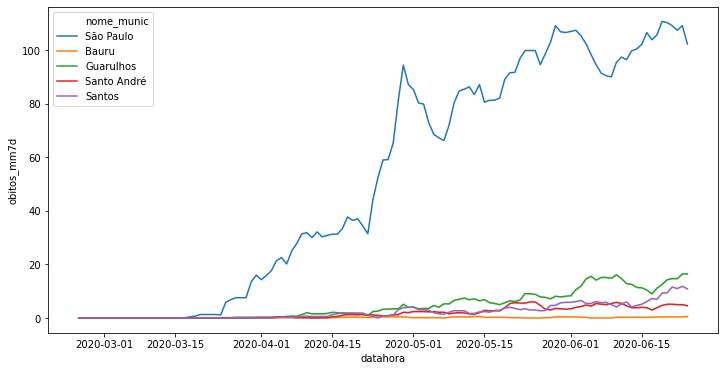

In [25]:
#Gerando o gráfico

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(x = "datahora", y = "obitos_mm7d", data = obitos_mm7d_Selection, hue='nome_munic')
